<a href="https://colab.research.google.com/github/kushalnavghare/playground/blob/master/Project_6_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6
Ilyas Ustun



## Classification of Malaria Images Using Deep Learning
The Malaria dataset contains a total of 27,558 cell images with equal instances
of parasitized and uninfected cells from the thin blood smear slide images of
segmented cells.

In [ ]:
import pandas as pd
import numpy as np
points = pd.DataFrame({'Q': np.arange(1, 7).astype(str), 'Point': [15, 15, 15, 15, 20, 20]})
points = pd.concat([points, pd.DataFrame(data={'Q':'Total', 'Point': [points.Point.sum()]})], axis=0)
points

,Q,Point
0,1,15
1,2,15
2,3,15
3,4,15
4,5,20
5,6,20
0,Total,100


In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from time import time
import sklearn
from sklearn import model_selection, metrics, decomposition

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
tf.__version__, sklearn.__version__

('2.15.0', '1.2.2')

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
# split=["train[0%:20%]", "train[20%:30%]", "train[30%:]"]
# Get the data from tfds. This might take some time
(ds_test, ds_val, ds_train), info = tfds.load('malaria', split=["train[0:2000]", "train[2000:3000]", "train[3000:10000]"], shuffle_files=False, as_supervised=True, with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
print(ds_train)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.2MI4PY_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpjwja6rrltfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


,image,label
0,,1 (uninfected)
1,,1 (uninfected)
2,,1 (uninfected)
3,,1 (uninfected)
4,,0 (parasitized)
5,,0 (parasitized)
6,,1 (uninfected)
7,,0 (parasitized)
8,,1 (uninfected)
9,,1 (uninfected)

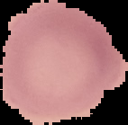
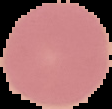
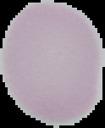
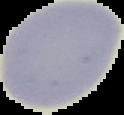
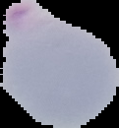
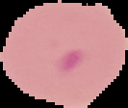
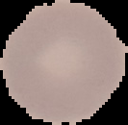
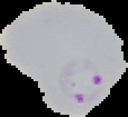
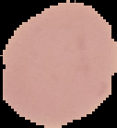
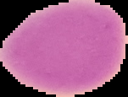

In [ ]:
tfds.as_dataframe(ds_train.take(10), info)

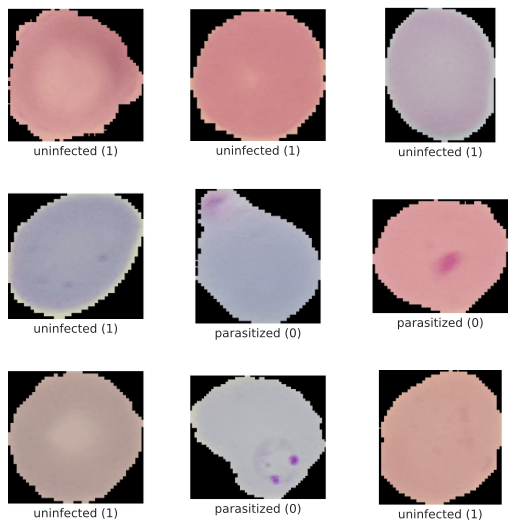

In [ ]:
fig = tfds.show_examples(ds_train, info)

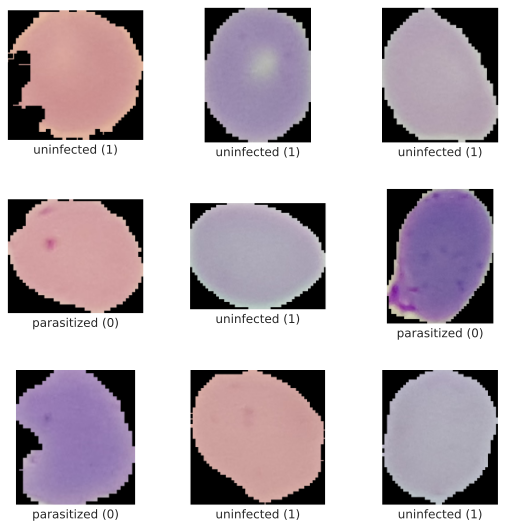

In [ ]:
fig = tfds.show_examples(ds_val, info)

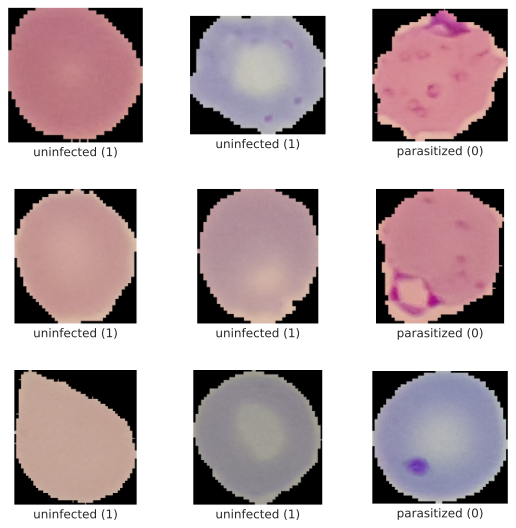

In [ ]:
fig = tfds.show_examples(ds_test, info)

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
print(info.splits)

{Split('train'): <SplitInfo num_examples=27558, num_shards=4>}


In [ ]:
print(info.supervised_keys)

('image', 'label')


In [ ]:
info.name

'malaria'

In [ ]:
ds1 = ds_train.take(10)  # Only take a single example

# for example in ds1:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
#   print(list(example.keys()))
#   image = example["image"]
#   label = example["label"]
#   print(image.shape, label)

for image, label in ds1:  # example is (image, label)
  print(image.shape, label)
  print(image.numpy().max())
  print(image.numpy().min())

(139, 142, 3) tf.Tensor(1, shape=(), dtype=int64)
228
0
(109, 112, 3) tf.Tensor(1, shape=(), dtype=int64)
228
0
(151, 124, 3) tf.Tensor(1, shape=(), dtype=int64)
203
0
(115, 124, 3) tf.Tensor(1, shape=(), dtype=int64)
217
0
(130, 121, 3) tf.Tensor(0, shape=(), dtype=int64)
205
0
(112, 133, 3) tf.Tensor(0, shape=(), dtype=int64)
228
0
(130, 133, 3) tf.Tensor(1, shape=(), dtype=int64)
200
0
(157, 172, 3) tf.Tensor(0, shape=(), dtype=int64)
211
0
(139, 127, 3) tf.Tensor(1, shape=(), dtype=int64)
222
0
(115, 151, 3) tf.Tensor(1, shape=(), dtype=int64)
250
0


In [ ]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (None, None, 3), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(None, None, 3)
<dtype: 'uint8'>


In [ ]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(1))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('uninfected'))

2
['parasitized', 'uninfected']
uninfected
1


In [ ]:
print(info.splits)

{Split('train'): <SplitInfo num_examples=27558, num_shards=4>}


In [ ]:
print(list(info.splits.keys()))

[Split('train')]


In [ ]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

27558
['malaria-train.tfrecord-00000-of-00004', 'malaria-train.tfrecord-00001-of-00004', 'malaria-train.tfrecord-00002-of-00004', 'malaria-train.tfrecord-00003-of-00004']
4


In [ ]:
DATASET_SIZE = info.splits['train'].num_examples
DATASET_SIZE

27558

In [ ]:
# train_size = int(0.7 * DATASET_SIZE)
# val_size  = int(0.2 * DATASET_SIZE)
# test_size  = int(0.1 * DATASET_SIZE)

# train_dataset = ds.take(train_size)
# val_dataset  = ds.skip(train_size).take(val_size)
# test_dataset  = ds.skip(train_size).skip(val_size).take(test_size)

In [ ]:
tf.data.experimental.cardinality(ds_train).numpy()

7000

In [ ]:
tf.data.experimental.cardinality(ds_val).numpy()

1000

In [ ]:
tf.data.experimental.cardinality(ds_test).numpy()

2000

When we check one of the images we can see that it is a matrix of numbers ranging from 0 to 255. Each value represents a pixel density where 0 means nothing, and 255 means highest density. Let's visualize the above plot to make sense ot it.

(139, 142, 3) tf.Tensor(1, shape=(), dtype=int64)
228
0


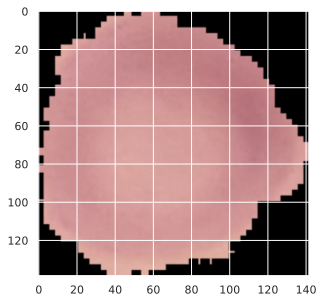

In [ ]:
for image, label in ds_train.take(1) :  # example is (image, label)
  print(image.shape, label)
  print(image.numpy().max())
  print(image.numpy().min())
  plt.imshow(image)

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 4))

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'val'], loc='upper left')
    ax1.set_ylim(0.5, 1)
    # ax1.show()

    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'val'], loc='upper left')

    fig.tight_layout()
    plt.show()

In [ ]:
EPOCHS = 20
BUFFER_SIZE = 1024 # Buffer size should be bigger than the batch size
BATCH_SIZE = 32  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 100

TRAIN_SIZE = tf.data.experimental.cardinality(ds_train).numpy()

INPUT_SHAPE = (IMG_SHAPE, IMG_SHAPE, 3)

**Images without Augmentation**

In [ ]:
# Create normalized datasets
def normalize_resize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.divide(image, 255)
    image = tf.image.resize(image, (IMG_SHAPE, IMG_SHAPE))
    return image, label

train_dataset = ds_train.map(normalize_resize).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_dataset = ds_val.map(normalize_resize).cache().batch(BATCH_SIZE)
test_dataset = ds_test.map(normalize_resize).cache().batch(BATCH_SIZE)

### Q 1.

NN for image classification without convolutional layers:  
  - Build a NN model by first flattening the images
  - Then feed the data into fully connected NN:
    - Have 3 hidden layers
    - 1st layer:128, 2nd layer:64, 3rd layer:32 neurons
    - Use relu activation function in each layer
    - For the output use softmax activation

Compile:  
  - Loss function: ? Use the correct loss function
  - Optimizer: Adam
  - Metrics: accuracy

Train:
  - 20 epochs
  - Use the validation data to check on validation during the fitting
  - Use accuracy in metrics

Metrics:
- Show the training and validation accuracies
- Show the loss and accuracy vs epoch plot for both training and validation

In [ ]:
# Build the model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    ]
                                   )

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
steps_per_epoch = len(ds_train) // BATCH_SIZE
validation_steps = len(ds_val) // BATCH_SIZE

In [ ]:
steps_per_epoch, validation_steps

(218, 31)

In [ ]:
INPUT_SHAPE

(100, 100, 3)

In [ ]:
history = model1.fit(train_dataset,
                     epochs=20,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps
                     )

Epoch 1/20
218/218 [==============================] - 18s 60ms/step - loss: 0.8706 - accuracy: 0.5751 - val_loss: 0.6626 - val_accuracy: 0.6069
Epoch 2/20
218/218 [==============================] - 5s 21ms/step - loss: 0.6843 - accuracy: 0.6015 - val_loss: 0.7788 - val_accuracy: 0.5060
Epoch 3/20
218/218 [==============================] - 3s 16ms/step - loss: 0.6610 - accuracy: 0.6195 - val_loss: 0.6104 - val_accuracy: 0.6663
Epoch 4/20
218/218 [==============================] - 3s 15ms/step - loss: 0.6474 - accuracy: 0.6329 - val_loss: 0.5998 - val_accuracy: 0.6683
Epoch 5/20
218/218 [==============================] - 5s 21ms/step - loss: 0.6126 - accuracy: 0.6675 - val_loss: 0.5907 - val_accuracy: 0.6845
Epoch 6/20
218/218 [==============================] - 4s 16ms/step - loss: 0.6033 - accuracy: 0.6742 - val_loss: 0.6000 - val_accuracy: 0.6673
Epoch 7/20
218/218 [==============================] - 5s 21ms/step - loss: 0.6089 - accuracy: 0.6685 - val_loss: 0.6111 - val_accuracy: 0.660

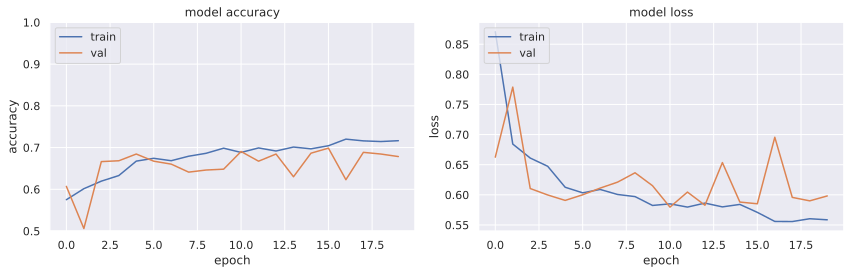

In [ ]:
plot_history(history)

In [ ]:
train_res = model1.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 0.5519150495529175
Training accuracy: 0.7312213182449341


In [ ]:
val_res = model1.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.5988685488700867
val accuracy: 0.6779999732971191


### Q 2.

NN for image classification with convolutional layers:  
  - Build a NN model by first feeding the images into the colvolutional layers.
  - Have 3 Convolutional layers (Conv2D) followed by MaxPooling (MaxPooling2D) layers:
    - The number of convolutional filters (the depth of `Conv2D` layers) in order: 8, 16, 32
    - Use (3,3) kernel, padding='same', and `tanh` activation in Conv2D
    - Use (2,2) pooling kernels in MaxPooling layers with strides=2
    - Flatten the output from the final MaxPooling layer
  - Then feed the data into fully connected NN:
    - Have 3 hidden layers
    - 1st layer:128, 2nd layer:64, 3rd layer:32 neurons
    - Use relu activation function in each layer
  - For the output use softmax activation

Compile:  
  - Loss function: ? Use the correct loss function
  - Optimizer: Adam
  - Metrics: accuracy

Train:
  - 20 epochs
  - Use the validation data to check on validation during the fitting
  - Use accuracy in metrics

Metrics:
- Show the training and validation accuracies
- Show the loss and accuracy vs epoch plot for both training and validation

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='tanh', input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(train_dataset,
                     epochs=20,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Epoch 1/20
218/218 [==============================] - 6s 9ms/step - loss: 0.5860 - accuracy: 0.6836 - val_loss: 0.4772 - val_accuracy: 0.7772
Epoch 2/20
218/218 [==============================] - 2s 8ms/step - loss: 0.4410 - accuracy: 0.7895 - val_loss: 0.3076 - val_accuracy: 0.8649
Epoch 3/20
218/218 [==============================] - 2s 8ms/step - loss: 0.2733 - accuracy: 0.8904 - val_loss: 0.2171 - val_accuracy: 0.9153
Epoch 4/20
218/218 [==============================] - 2s 8ms/step - loss: 0.1899 - accuracy: 0.9301 - val_loss: 0.1887 - val_accuracy: 0.9264
Epoch 5/20
218/218 [==============================] - 2s 8ms/step - loss: 0.1517 - accuracy: 0.9407 - val_loss: 0.1892 - val_accuracy: 0.9284
Epoch 6/20
218/218 [==============================] - 2s 10ms/step - loss: 0.1162 - accuracy: 0.9564 - val_loss: 0.1849 - val_accuracy: 0.9294
Epoch 7/20
218/218 [==============================] - 2s 8ms/step - loss: 0.0988 - accuracy: 0.9621 - val_loss: 0.2088 - val_accuracy: 0.9274
Epoch

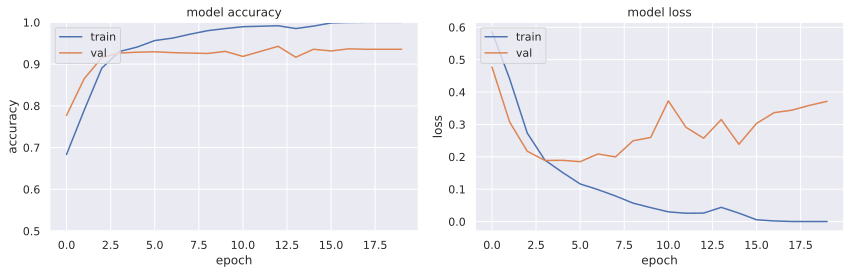

In [ ]:
plot_history(history)

In [ ]:
train_res = model2.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 7.497841579606757e-05
Training accuracy: 1.0


In [ ]:
val_res = model2.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.3683251440525055
val accuracy: 0.9359999895095825


**Images with Augmentation**

In [ ]:
def normalize_resize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.divide(image, 255)
    image = tf.image.resize(image, (IMG_SHAPE, IMG_SHAPE))
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label

train_dataset = ds_train.map(normalize_resize).cache().map(augment).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_dataset = ds_val.map(normalize_resize).cache().batch(BATCH_SIZE)
test_dataset = ds_test.map(normalize_resize).cache().batch(BATCH_SIZE)

(32, 100, 100, 3)
tf.Tensor([0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1], shape=(32,), dtype=int64)


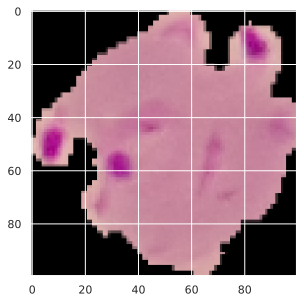

In [ ]:
for image, label in train_dataset.take(1):
  print(image.shape)
  print(label)
  plt.imshow(image[0])

>**NOTE: From this point onward use the augmented data**

### Q 3.

NN for image classification without convolutional layers:  
  - Build a NN model by first flattening the images
  - Then feed the data into fully connected NN:
    - Have 3 hidden layers
    - 1st layer:128, 2nd layer:64, 3rd layer:32 neurons
    - Use relu activation function in each layer
    - For the output use softmax activation

Compile:  
  - Loss function: ? Use the correct loss function
  - Optimizer: Adam
  - Metrics: accuracy

Train:
  - 20 epochs
  - Use the validation data to check on validation during the fitting
  - Use accuracy in metrics

Metrics:
- Show the training and validation accuracies
- Show the loss and accuracy vs epoch plot for both training and validation

In [ ]:
# Define the model
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(INPUT_SHAPE)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model3.fit(train_dataset,
                     epochs=20,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Epoch 1/20
218/218 [==============================] - 10s 39ms/step - loss: 0.9891 - accuracy: 0.5560 - val_loss: 0.6719 - val_accuracy: 0.5907
Epoch 2/20
218/218 [==============================] - 3s 13ms/step - loss: 0.6838 - accuracy: 0.6161 - val_loss: 0.6078 - val_accuracy: 0.6704
Epoch 3/20
218/218 [==============================] - 2s 10ms/step - loss: 0.8125 - accuracy: 0.5997 - val_loss: 0.6162 - val_accuracy: 0.6623
Epoch 4/20
218/218 [==============================] - 2s 9ms/step - loss: 0.6609 - accuracy: 0.6220 - val_loss: 0.6013 - val_accuracy: 0.6734
Epoch 5/20
218/218 [==============================] - 2s 10ms/step - loss: 0.6334 - accuracy: 0.6485 - val_loss: 0.6153 - val_accuracy: 0.6512
Epoch 6/20
218/218 [==============================] - 3s 12ms/step - loss: 0.6290 - accuracy: 0.6547 - val_loss: 0.6688 - val_accuracy: 0.6028
Epoch 7/20
218/218 [==============================] - 3s 12ms/step - loss: 0.6387 - accuracy: 0.6441 - val_loss: 0.6202 - val_accuracy: 0.6683

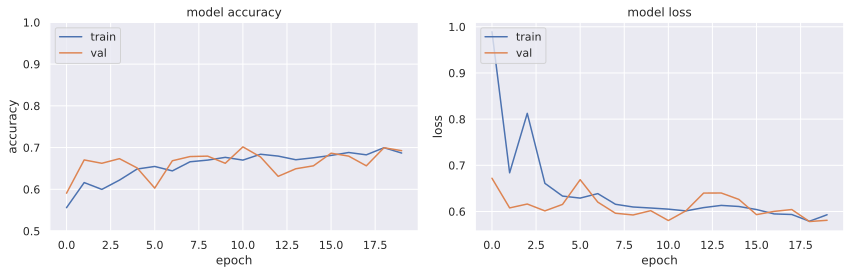

In [ ]:
plot_history(history)

In [ ]:
train_res = model3.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 0.5667977333068848
Training accuracy: 0.7049885392189026


In [ ]:
val_res = model3.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.5831871628761292
val accuracy: 0.6890000104904175


### Q 4.

NN for image classification with convolutional layers:  
  - Build a NN model by first feeding the images into the colvolutional layers.
  - Have 3 Convolutional layers (Conv2D) followed by MaxPooling (MaxPooling2D) layers:
    - The number of convolutional filters (the depth of `Conv2D` layers) in order: 8, 16, 32
    - Use (3,3) kernel, padding='same', and `tanh` activation in Conv2D
    - Use (2,2) pooling kernels in MaxPooling layers with strides=2
    - Flatten the output from the final MaxPooling layer
  - Then feed the data into fully connected NN:
    - Have 3 hidden layers
    - 1st layer:128, 2nd layer:64, 3rd layer:32 neurons
    - Use relu activation function in each layer
  - For the output use softmax activation

Compile:  
  - Loss function: ? Use the correct loss function
  - Optimizer: Adam
  - Metrics: accuracy

Train:
  - 20 epochs
  - Use the validation data to check on validation during the fitting
  - Use accuracy in metrics

Metrics:
- Show the training and validation accuracies
- Show the loss and accuracy vs epoch plot for both training and validation

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='tanh', input_shape=(INPUT_SHAPE)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model4.fit(train_dataset,
                     epochs=20,
                     steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps)

Epoch 1/20
218/218 [==============================] - 4s 9ms/step - loss: 0.6627 - accuracy: 0.5969 - val_loss: 0.6428 - val_accuracy: 0.6250
Epoch 2/20
218/218 [==============================] - 2s 9ms/step - loss: 0.5323 - accuracy: 0.7329 - val_loss: 0.4589 - val_accuracy: 0.7661
Epoch 3/20
218/218 [==============================] - 2s 9ms/step - loss: 0.4328 - accuracy: 0.8027 - val_loss: 0.3338 - val_accuracy: 0.8448
Epoch 4/20
218/218 [==============================] - 2s 10ms/step - loss: 0.2722 - accuracy: 0.8871 - val_loss: 0.2975 - val_accuracy: 0.8609
Epoch 5/20
218/218 [==============================] - 3s 13ms/step - loss: 0.2024 - accuracy: 0.9218 - val_loss: 0.2049 - val_accuracy: 0.9133
Epoch 6/20
218/218 [==============================] - 2s 9ms/step - loss: 0.1959 - accuracy: 0.9229 - val_loss: 0.2155 - val_accuracy: 0.9103
Epoch 7/20
218/218 [==============================] - 2s 8ms/step - loss: 0.1509 - accuracy: 0.9425 - val_loss: 0.1905 - val_accuracy: 0.9254
Epoc

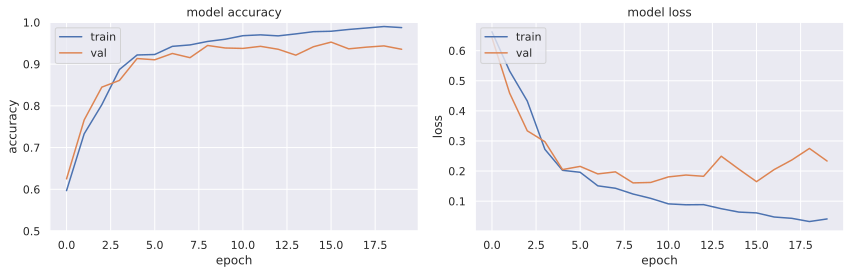

In [ ]:
plot_history(history)

In [ ]:
train_res = model4.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 0.027900658547878265
Training accuracy: 0.9916858077049255


In [ ]:
val_res = model4.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.23162436485290527
val accuracy: 0.9359999895095825


### Q 5.

Use keras tuner to tune some of the hyperparameters. Create at least two different tuning models each focusing on one or more hyperparameters.

- After tuning is finished, train and validate the tuned models:
  - Show the training and validation accuracies
  - Show the loss and accuracy vs epoch plot for both training and validation

It will also help to improve your model by increasing number of epochs, changing the methods of `tf.image` applied during data augmentation, and by applying other approaches.

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from kerastuner import HyperModel

##### Tuner 1

In [ ]:
hp = kt.HyperParameters()

In [ ]:
neurons_layer1 = hp.Choice('neurons_layer1', [0, 16, 32])
neurons_layer2 = hp.Choice('neurons_layer2', [0, 32, 64])
neurons_layer3 = hp.Choice('neurons_layer3', [0, 16, 32])

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(INPUT_SHAPE)))

  neurons_layer1 = hp.Choice('neurons_layer1', [0, 16, 32])
  neurons_layer2 = hp.Choice('neurons_layer2', [0, 32, 64])
  neurons_layer3 = hp.Choice('neurons_layer3', [0, 64, 128])
  neurons_layer4 = hp.Choice('neurons_layer4', [0, 128, 256])

  # 0 means False in boolean value, so when 0 is chosen, that layer will not be added
  if neurons_layer1:
    model.add(tf.keras.layers.Dense(units=neurons_layer1, activation='relu'))
  if neurons_layer2:
    model.add(tf.keras.layers.Dense(units=neurons_layer2, activation='relu'))
  if neurons_layer3:
    model.add(tf.keras.layers.Dense(units=neurons_layer3, activation='relu'))
  if neurons_layer4:
    model.add(tf.keras.layers.Dense(units=neurons_layer4, activation='relu'))




  model.add(tf.keras.layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     overwrite=True)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_dataset,
             epochs=10,
             steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps,
             callbacks=[stop_early])

Trial 30 Complete [00h 00m 23s]
val_accuracy: 0.5191532373428345

Best val_accuracy So Far: 0.6864919066429138
Total elapsed time: 00h 05m 01s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'neurons_layer1': 0,
 'neurons_layer2': 0,
 'neurons_layer3': 0,
 'neurons_layer4': 128,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
hypermodel1 = tuner.hypermodel.build(best_hps)
hypermodel1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3840128   
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3840386 (14.65 MB)
Trainable params: 3840386 (14.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Retrain the model
history = hypermodel1.fit(train_dataset,
                         epochs=10,
                         steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps
                         )

Epoch 1/10
218/218 [==============================] - 3s 7ms/step - loss: 1.6154 - accuracy: 0.5595 - val_loss: 0.7370 - val_accuracy: 0.6643
Epoch 2/10
218/218 [==============================] - 2s 7ms/step - loss: 0.9022 - accuracy: 0.6115 - val_loss: 0.8212 - val_accuracy: 0.5575
Epoch 3/10
218/218 [==============================] - 3s 14ms/step - loss: 0.8590 - accuracy: 0.6115 - val_loss: 0.7128 - val_accuracy: 0.6290
Epoch 4/10
218/218 [==============================] - 2s 11ms/step - loss: 0.7106 - accuracy: 0.6346 - val_loss: 0.6093 - val_accuracy: 0.6663
Epoch 5/10
218/218 [==============================] - 2s 9ms/step - loss: 0.7259 - accuracy: 0.6310 - val_loss: 0.6183 - val_accuracy: 0.6633
Epoch 6/10
218/218 [==============================] - 2s 9ms/step - loss: 0.7069 - accuracy: 0.6306 - val_loss: 0.7082 - val_accuracy: 0.5988
Epoch 7/10
218/218 [==============================] - 2s 11ms/step - loss: 0.6504 - accuracy: 0.6444 - val_loss: 0.6365 - val_accuracy: 0.6391
Epo

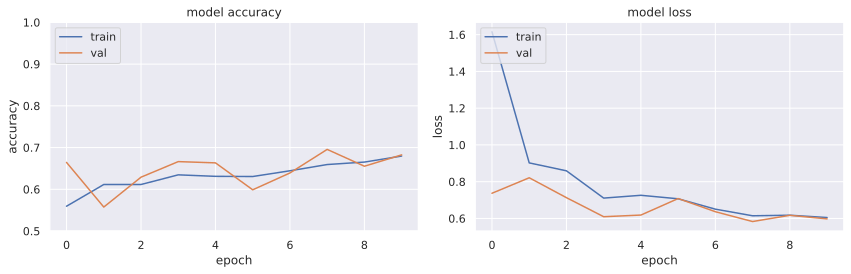

In [ ]:
plot_history(history)

In [ ]:
train_res = hypermodel1.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 0.5804786682128906
Training accuracy: 0.697677731513977


In [ ]:
val_res = hypermodel1.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.5984957814216614
val accuracy: 0.6830000281333923


In [ ]:
# Define the model builder function
def model_builder(hp):
  model = tf.keras.models.Sequential()

  # Tune the number of filters in the first convolution layer
  hp_filters_1 = hp.Int('filters_1', min_value=8, max_value=32, step=8)
  model.add(tf.keras.layers.Conv2D(filters=hp_filters_1,
                                     kernel_size=3,
                                     padding='same',
                                     activation='tanh',
                                     input_shape=(INPUT_SHAPE)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

  # Tune the number of filters in the second convolutional layer
  hp_filters_2 = hp.Int('filters_2', min_value=16, max_value=64, step=16)
  model.add(tf.keras.layers.Conv2D(filters=hp_filters_2, kernel_size=(3, 3), padding='same', activation='tanh'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

  # Tune the number of filters in the third convolutional layer
  hp_filters_3 = hp.Int('filters_3', min_value=32, max_value=128, step=32)
  model.add(tf.keras.layers.Conv2D(filters=hp_filters_3, kernel_size=(3, 3), padding='same', activation='tanh'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

  model.add(tf.keras.layers.Flatten())

  # Tune the number of units in the dense layers
  hp_units_1 = hp.Int('units_1', min_value=128, max_value=256, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_1, activation='relu'))

  hp_units_2 = hp.Int('units_2', min_value=64, max_value=128, step=16)
  model.add(tf.keras.layers.Dense(units=hp_units_2, activation='relu'))

  hp_units_2 = hp.Int('units_2', min_value=32, max_value=64, step=16)
  model.add(tf.keras.layers.Dense(units=hp_units_2, activation='relu'))

  model.add(tf.keras.layers.Dense(32, activation='relu'))

  # Output layer
  model.add(tf.keras.layers.Dense(2, activation='softmax'))

  # Compile the model
  model.compile(optimizer="adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='TuningKerasModel',
                     overwrite=True)

In [ ]:
tuner.search(train_dataset,
             epochs=10,
             steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps,
             callbacks=[stop_early])

Trial 10 Complete [00h 00m 20s]
val_accuracy: 0.944556474685669

Best val_accuracy So Far: 0.944556474685669
Total elapsed time: 00h 02m 57s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'filters_1': 24,
 'filters_2': 48,
 'filters_3': 96,
 'units_1': 192,
 'units_2': 128,
 'tuner/epochs': 5,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0001'}

In [ ]:
hypermodel2 = tuner.hypermodel.build(best_hps)
hypermodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 24)      672       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 48)        10416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 96)        41568     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 96)       

In [ ]:
# Retrain the model
history = hypermodel2.fit(train_dataset,
                         epochs=10,
                         steps_per_epoch=steps_per_epoch,
                     validation_data=val_dataset,
                     validation_steps=validation_steps
                         )

Epoch 1/10
218/218 [==============================] - 5s 15ms/step - loss: 0.6532 - accuracy: 0.6261 - val_loss: 0.5898 - val_accuracy: 0.6905
Epoch 2/10
218/218 [==============================] - 4s 17ms/step - loss: 0.5223 - accuracy: 0.7466 - val_loss: 0.3474 - val_accuracy: 0.8347
Epoch 3/10
218/218 [==============================] - 3s 14ms/step - loss: 0.2544 - accuracy: 0.9014 - val_loss: 0.1937 - val_accuracy: 0.9294
Epoch 4/10
218/218 [==============================] - 3s 14ms/step - loss: 0.1750 - accuracy: 0.9383 - val_loss: 0.2269 - val_accuracy: 0.9153
Epoch 5/10
218/218 [==============================] - 3s 15ms/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 0.1653 - val_accuracy: 0.9395
Epoch 6/10
218/218 [==============================] - 4s 17ms/step - loss: 0.1302 - accuracy: 0.9559 - val_loss: 0.1489 - val_accuracy: 0.9435
Epoch 7/10
218/218 [==============================] - 3s 14ms/step - loss: 0.1272 - accuracy: 0.9532 - val_loss: 0.1681 - val_accuracy: 0.9415

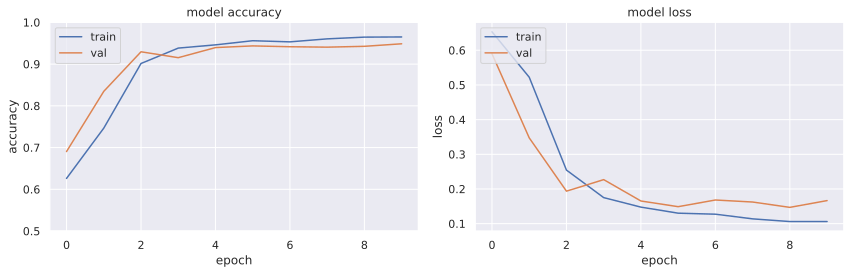

In [ ]:
plot_history(history)

In [ ]:
train_res = hypermodel2.evaluate(train_dataset, steps=steps_per_epoch, verbose=333)
print(f"Training loss: {train_res[0]}")
print(f"Training accuracy: {train_res[1]}")

Training loss: 0.07318868488073349
Training accuracy: 0.974197268486023


In [ ]:
val_res = hypermodel2.evaluate(val_dataset, steps=steps_per_epoch, verbose=333)
print(f"val loss: {val_res[0]}")
print(f"val accuracy: {val_res[1]}")

val loss: 0.16835224628448486
val accuracy: 0.9480000138282776


### Q 6.
Get the models from Q1-Q4, and the models you created in Q5.
- Make predictions on the testing data using these models.
- Create a table of results showing the models in each row, and the columns having the performance metrics:
- Accuracy, Average F1 score, Average Recall, Average Precision

Discuss:
- Which model is the best?
- Based on the loss and accuracy vs epoch graphs you created before, which models seem to be overfitting, if any?

In [ ]:
models = {
    'Model_Q1': model1,
    'Model_Q2': model2,
    'Model_Q3': model3,
    'Model_Q4': model4,
    'tuning_1': hypermodel1,
    'tuning_2': hypermodel2
}
# Container to store results
results = []

In [ ]:
get_label = lambda probs: np.argmax(probs, axis=1)

In [ ]:
y_test = []
for _, label in ds_test:
  y_test.append(label.numpy())

In [ ]:
y_test = np.array(y_test)

In [ ]:
# Evaluate each model
for name, tmp_model in models.items():

  test_pred_proba = tmp_model.predict(test_dataset, verbose=123)
  test_y_pred = get_label(test_pred_proba)

  test_acc = metrics.accuracy_score(y_test, test_y_pred)
  test_f1 = metrics.f1_score(y_test, test_y_pred, average='weighted')
  test_recall = metrics.recall_score(y_test, test_y_pred, average='weighted')
  test_precision = metrics.precision_score(y_test, test_y_pred, average='weighted')
  results.append({
        'Model': name,
        'Accuracy': test_acc,
        'Average F1 Score': test_f1,
        'Average Recall': test_recall,
        'Average Precision': test_precision
    })

In [ ]:
results

[{'Model': 'Model_Q1',
  'Accuracy': 0.6855,
  'Average F1 Score': 0.6801049989106943,
  'Average Recall': 0.6855,
  'Average Precision': 0.7035437444131694},
 {'Model': 'Model_Q2',
  'Accuracy': 0.9345,
  'Average F1 Score': 0.9344941503212463,
  'Average Recall': 0.9345,
  'Average Precision': 0.9345112129300742},
 {'Model': 'Model_Q3',
  'Accuracy': 0.6975,
  'Average F1 Score': 0.6967623619434606,
  'Average Recall': 0.6975,
  'Average Precision': 0.6982141374157784},
 {'Model': 'Model_Q4',
  'Accuracy': 0.939,
  'Average F1 Score': 0.9389750831961747,
  'Average Recall': 0.939,
  'Average Precision': 0.9392211238981686},
 {'Model': 'tuning_1',
  'Accuracy': 0.68,
  'Average F1 Score': 0.675685229656968,
  'Average Recall': 0.68,
  'Average Precision': 0.6941633691829004},
 {'Model': 'tuning_2',
  'Accuracy': 0.9515,
  'Average F1 Score': 0.9514606836624375,
  'Average Recall': 0.9515,
  'Average Precision': 0.9521475279515075}]

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

      Model  Accuracy  Average F1 Score  Average Recall  Average Precision
0  Model_Q1    0.6855          0.680105          0.6855           0.703544
1  Model_Q2    0.9345          0.934494          0.9345           0.934511
2  Model_Q3    0.6975          0.696762          0.6975           0.698214
3  Model_Q4    0.9390          0.938975          0.9390           0.939221
4  tuning_1    0.6800          0.675685          0.6800           0.694163
5  tuning_2    0.9515          0.951461          0.9515           0.952148


In [ ]:
results_df.sort_values('Average F1 Score', ascending=False)

,Model,Accuracy,Average F1 Score,Average Recall,Average Precision
5,tuning_2,0.9515,0.951461,0.9515,0.952148
3,Model_Q4,0.9390,0.938975,0.9390,0.939221
1,Model_Q2,0.9345,0.934494,0.9345,0.934511
2,Model_Q3,0.6975,0.696762,0.6975,0.698214
0,Model_Q1,0.6855,0.680105,0.6855,0.703544
4,tuning_1,0.6800,0.675685,0.6800,0.694163


Best model

In [ ]:
hypermodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 24)      672       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 48)        10416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 96)        41568     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 96)       

Based on the loss and accuracy vs epoch graphs you created before, which models seem to be overfitting, if any?

Model 4 and Model 2 are overfitting based on learning curves.

As the validation loss increases with increase in epochs, the training loss keeps shows chance of further decrease.

This means that the model is learning too well on the training samples, however it is not performing well on new data (val dataset).

